# Explanatory Data Analysis
by Grace

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import somoclu


If you installed Somoclu with pip on macOS, this typically means missing a linked library. If you compiled Somoclu with GCC, please make sure you have set DYLD_LIBRARY_PATH to include the GCC path. For more information, please refer to the documentation.


## Load Dataset:

In [2]:
import json

data1 = []

# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain1_train.json", 'r') as file:
    for line in file:
        data1.append(json.loads(line.strip()))

data2 = []

# Assuming the NDJSON data is stored in a file called 'data.ndjson'
with open("../data/domain2_train.json", 'r') as file:
    for line in file:
        data2.append(json.loads(line.strip()))


In [3]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Separate the text and labels
#X = pd.DataFrame(df1['text'].tolist())
#y = df1['label']

In [4]:
df1

,text,label
0,"[70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...",1
1,"[1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...",1
2,"[287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...",1
3,"[0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...",1
4,"[9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...",1
...,...,...
19495,"[3987, 4, 2, 2536, 3611, 3, 5, 1125, 269, 2324...",0
19496,"[2, 132, 87, 980, 4, 2, 379, 12, 1336, 38, 299...",0
19497,"[1820, 93, 3, 548, 1, 1072, 1, 3, 2, 2741, 104...",0
19498,"[5, 48, 6, 2662, 17, 9, 5, 902, 2, 48, 6, 84, ...",0


##  Basic Visualization:
refer to `read_data.ipynb`

## Basic EDA (cont.)
1. Basic Statistics
2. Token Frequency Analysis
3. Text Length Distribution
4. Most Common & Rare Tokens for Each Class

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

def EDA(df):
    # 1. Basic Statistics
    print(f"Total Samples: {len(df)}")
    print(df['label'].value_counts())

    # 2. Token Frequency Analysis
    tokens = [token for sublist in df['text'] for token in sublist]
    token_freq = Counter(tokens)

    # Top 10 most common tokens
    print(f'Top 10 most common tokens{token_freq.most_common(10)}')

    # 3. Text Length Distribution
    df['text_len'] = df['text'].apply(len)
    plt.figure(figsize=(12, 6))
    sns.histplot(df, x="text_len", hue="label", element="step", stat="density", common_norm=False)
    plt.title("Text Length Distribution")
    plt.show()

    # 4. Unique Tokens Count
    df['unique_tokens'] = df['text'].apply(lambda x: len(set(x)))
    sns.histplot(df, x="unique_tokens", hue="label", element="step", stat="density", common_norm=False)
    plt.title("Unique Token Count Distribution")
    plt.show()

    # 5. N-gram Analysis
    def get_most_common_ngrams(data, n=2, top=10):
        all_ngrams = [gram for sublist in data for gram in ngrams(sublist, n)]
        return Counter(all_ngrams).most_common(top)

    machine_generated = df[df['label'] == 0]['text']
    human_generated = df[df['label'] == 1]['text']

    print("Most common bigrams for machine-generated texts:", get_most_common_ngrams(machine_generated, 2))
    print("Most common bigrams for human-generated texts:", get_most_common_ngrams(human_generated, 2))

    # 6. TF-IDF Analysis
    # Convert integer tokens to strings
    df['text_str'] = df['text'].apply(lambda x: ' '.join(map(str, x)))
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df['text_str'])

    feature_names = vectorizer.get_feature_names_out()
    mean_tfidf = X.mean(axis=0).tolist()[0]
    tfidf_ranking = [(feature_names[i], mean_tfidf[i]) for i in range(len(feature_names))]
    sorted_tfidf_ranking = sorted(tfidf_ranking, key=lambda x: x[1], reverse=True)
    print(f'top 10 important tokens by TFIDF {sorted_tfidf_ranking[:10]}')  # top 10 important tokens


Total Samples: 19500
1    9750
0    9750
Name: label, dtype: int64
Top 10 most common tokens[(0, 89837), (2, 56310), (1, 39104), (3, 39040), (6, 26353), (4, 19118), (5, 15303), (7, 14812), (9, 14685), (12, 10773)]


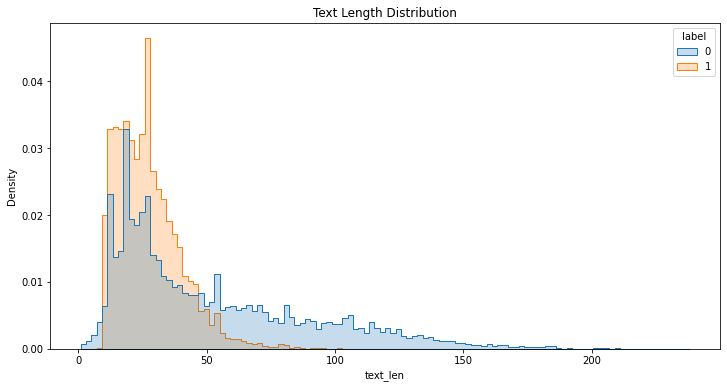

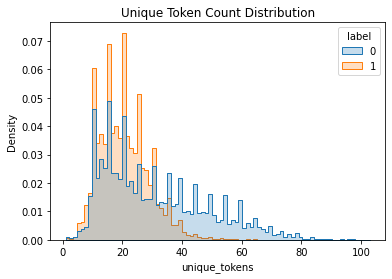

Most common bigrams for machine-generated texts: [((6, 2), 7384), ((0, 3), 7089), ((1, 0), 4895), ((0, 1), 4000), ((2, 0), 3923), ((3, 0), 3890), ((0, 0), 3488), ((3, 7), 3210), ((12, 2), 3008), ((2, 48), 2999)]
Most common bigrams for human-generated texts: [((0, 0), 8028), ((2, 0), 4209), ((0, 3), 3984), ((0, 1), 2109), ((3, 0), 2080), ((0, 7), 1690), ((5, 0), 1578), ((6, 2), 1577), ((7, 0), 1468), ((6, 0), 1459)]
top 10 important tokens by TFIDF [('12', 0.045508530466908156), ('17', 0.04186161099010504), ('16', 0.04144793065047611), ('48', 0.0351746863178206), ('18', 0.03336261611057995), ('10', 0.03200263508538248), ('15', 0.02953913762674253), ('19', 0.029048366701696842), ('33', 0.028545340590838457), ('13', 0.027114808082292646)]


In [36]:
EDA(df1)

Total Samples: 14900
0    12750
1     2150
Name: label, dtype: int64
Top 10 most common tokens[(0, 196810), (1, 156428), (2, 117530), (3, 93758), (4, 59652), (5, 54606), (8, 51197), (7, 46130), (6, 41385), (9, 35297)]


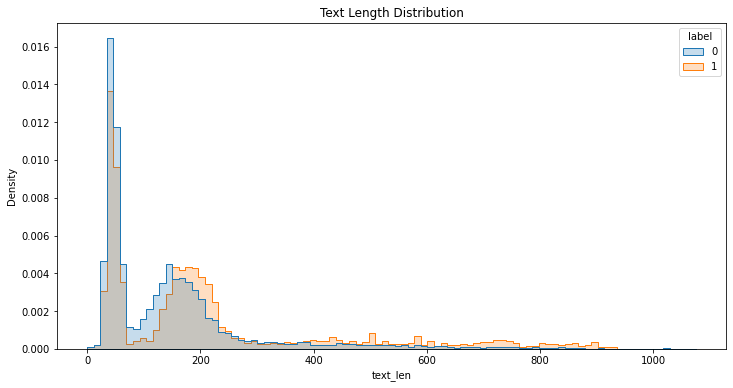

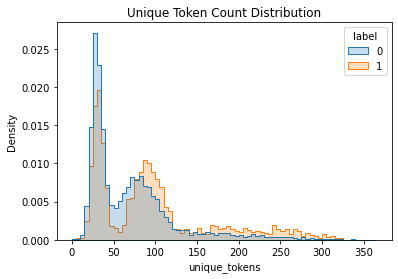

Most common bigrams for machine-generated texts: [((0, 1), 18914), ((2, 0), 16392), ((0, 0), 16079), ((0, 3), 15048), ((8, 15), 13880), ((1, 2), 12324), ((1, 11), 11272), ((5, 0), 8854), ((1, 14), 8571), ((6, 2), 8052)]
Most common bigrams for human-generated texts: [((0, 0), 6405), ((0, 1), 5606), ((0, 3), 5141), ((2, 0), 4937), ((8, 15), 3986), ((1, 2), 2671), ((3, 0), 2588), ((1, 0), 2514), ((5, 0), 2454), ((6, 2), 2075)]
top 10 important tokens by TFIDF [('11', 0.0984645603890659), ('14', 0.08560743695527513), ('10', 0.07771472206932399), ('27', 0.06416972031107544), ('13', 0.05966107061784775), ('21', 0.052254211256934406), ('36', 0.04856623037879699), ('25', 0.046883246719751685), ('12', 0.045526173494137886), ('20', 0.04542005328633193)]


In [37]:
EDA(df2)

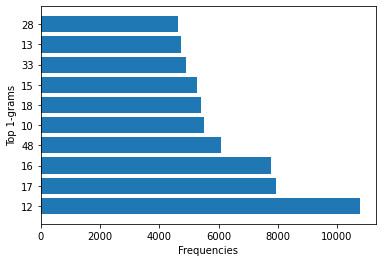

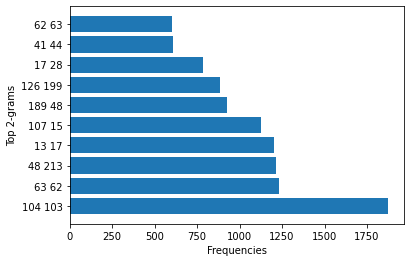

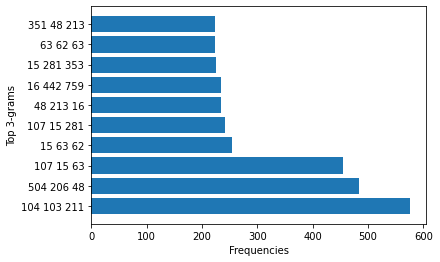

In [28]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import torch

# Sample data

# Convert the lists to string to work with CountVectorizer

# 1. N-gram Frequencies
def plot_top_ngrams(data, n=1):
    texts = [' '.join(map(str, item['text'])) for item in data]
    vectorizer = CountVectorizer(ngram_range=(n, n))
    vec_texts = vectorizer.fit_transform(texts)
    sum_words = vec_texts.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
    words, freqs = zip(*words_freq)
    plt.barh(words, freqs)
    plt.xlabel('Frequencies')
    plt.ylabel(f'Top {n}-grams')
    plt.show()

plot_top_ngrams(data1, 1)
plot_top_ngrams(data1, 2)
plot_top_ngrams(data1, 3)


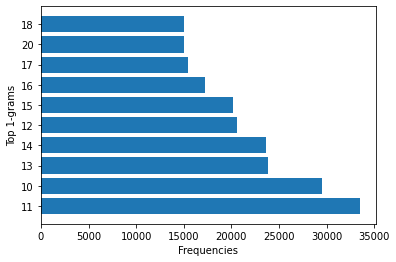

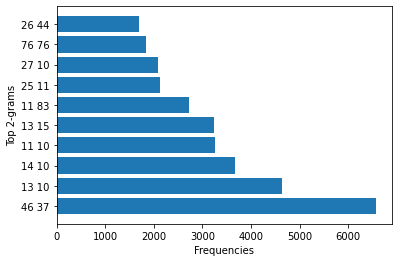

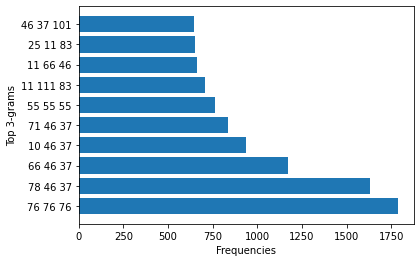

In [29]:
plot_top_ngrams(data2, 1)
plot_top_ngrams(data2, 2)
plot_top_ngrams(data2, 3)

### PCA

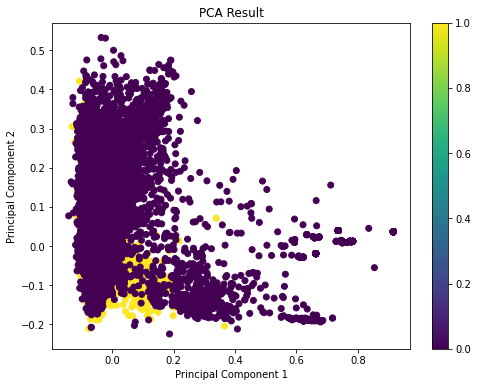

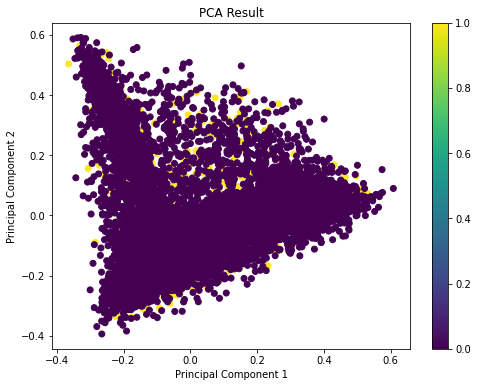

In [42]:
from sklearn.decomposition import PCA

def plot_pca(df):
    X = list(df['text'].apply(lambda x: ' '.join(map(str, x))))
    vectorizer = TfidfVectorizer(max_features=1000)
    X_tfidf = vectorizer.fit_transform(X).toarray()
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_tfidf)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['label'], cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.colorbar()
    plt.show()

plot_pca(df1)
plot_pca(df2)

### SMOTE:

SMOTE can be used to oversample the minority class in imbalanced datasets. It's not technically an EDA technique, but it can be useful if you're going to train a machine learning model and you want to handle class imbalance.

In [46]:
from imblearn.over_sampling import SMOTE

X = list(df1['text'].apply(lambda x: ' '.join(map(str, x))))
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X).toarray()
y = df1['label'].values

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)


### SOM:

SOM is a type of unsupervised neural network used for clustering and visualization. It maps input data into a grid (typically 2D) where similar data points are placed closer together.

In [ ]:
from minisom import MiniSom

def plot_som(df):
    X = list(df['text'].apply(lambda x: ' '.join(map(str, x))))
    vectorizer = TfidfVectorizer(max_features=1000)
    X_tfidf = vectorizer.fit_transform(X).toarray()
    
    som = MiniSom(30, 30, X_tfidf.shape[1], sigma=1.0, learning_rate=0.5)
    som.train_random(X_tfidf, 5000)  # Increase iterations
    
    plt.figure(figsize=(10, 10))
    for i, xx in enumerate(X_tfidf):
        w = som.winner(xx)
        plt.text(w[0], w[1], str(df['label'].iloc[i]), color=plt.cm.rainbow(df['label'].iloc[i] / len(set(df['label']))))
    plt.title('SOM')
    plt.show()

plot_som(df1)
